# Projeto 3 - Fazendo um modelo de investimento com Python - Factor Investing no Ibovespa.


### Desafio:

* Construir um código que faça um backtesting dos últimos 6 anos, escolhendo as 10 melhores ações do índice ibovespa e utilizando como critério o fator momento 6 meses.

### Passo a passo da estratégia:

   **Passo 1** - Definir um universo investível.

   **Passo 2** - Escolher o fator que servirá como critério para criação dos rankings.
   
   **Passo 3** - Escolher o período de teste.
   
   **Passo 4** - Escolher o número de ações na carteira. 
   
   **Passo 5** - Definir o período de balanceamento. De quanto em quanto tempo a carteira muda?
   
### Passo a passo do código? 

   **Passo 1** - Ler a composição histórica do Ibovespa e os tickers que já passaram pelo índice.
   
   **Passo 2** - Puxar as cotações de todas as empresas que farão parte do backtest.
   
   **Passo 3** - Transformar o índice em data e ordenar a série de tempo. 

   **Passo 4** - Calcular o retorno 6 meses e ajustar a tabela com o fator. 
   
   **Passo 5** - Classificar e retirar empresas que não participaram do Ibovespa no período de tempo selecionado.  
   
   **Passo 6** - Criar as carteiras de investimento em uma matriz de 0 ou 1. 
   
   **Passo 7** - Calcular o retorno mensal das empresas no período de backtest. 

   **Passo 8** - Cruzar a matriz de retorno mensal com a matriz das carteiras para chegar na rentabilidade do modelo.
   
   **Passo 9** - Puxar e calcular a rentabilidade do Ibovespa no período. 
   
   **Passo 10** - Calcular e visualizar as rentabilidades do modelo contra o Ibovespa. 

* Universo: Ibovespa
* Fator: MTUM 6 meses
* Período de teste: Desde 2016
* Nº de ações: 10 ações
* Rebalanceamento: Todo mês

In [321]:
import yfinance as yf
import pandas as pd
import quantstats as qs

# Passo 1 - Ler a composição histórica do Ibovespa e os tickers que já passaram pelo índice.

In [322]:
#Pegar de uma lib por critério de liquidez incluindo small caps, visto que não tem problema de capacity

composicao_historica = pd.read_excel(r'composicao_ibov.xlsx')
lista_acoes = pd.read_excel(r'composicao_ibov.xlsx', sheet_name = 'lista_acoes')

lista_acoes

['dolar', 'ibovespa']

['dolar', 'ibovespa']

In [323]:
composicao_historica

,2015-12-31,2016-01-31,2016-02-29,2016-03-31,2016-04-30,2016-05-31,2016-06-30,2016-07-31,2016-08-31,2016-09-30,...,2022-02-28,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30,2022-10-31,2022-11-30
0,ABEV3,ABEV3,ITUB4,ITUB4,ITUB4,ITUB4,ITUB4,ITUB4,ITUB4,ITUB4,...,VALE3,VALE3,VALE3,VALE3,VALE3,VALE3,VALE3,VALE3,VALE3,VALE3
1,AMER3,BBAS3,ABEV3,BBDC4,BBDC4,ABEV3,ABEV3,ABEV3,BBDC4,ABEV3,...,PETR4,PETR4,PETR4,PETR4,PETR4,PETR4,PETR4,ITUB4,PETR4,ITUB4
2,AURE3,BBDC3,BBDC4,ABEV3,ABEV3,BBDC4,BBDC4,BBDC4,ABEV3,BBDC4,...,ITUB4,ITUB4,ITUB4,ITUB4,ITUB4,ITUB4,ITUB4,PETR4,ITUB4,PETR4
3,B3SA3,BBDC4,BRFS3,PETR4,PETR4,BRFS3,PETR4,PETR4,PETR4,PETR4,...,PETR3,BBDC4,BBDC4,BBDC4,BBDC4,PETR3,PETR3,BBDC4,BBDC4,BBDC4
4,B3SA3,BBSE3,CIEL3,BRFS3,PETR3,PETR4,BRFS3,BRFS3,BRFS3,BRFS3,...,BBDC4,B3SA3,PETR3,PETR3,PETR3,BBDC4,BBDC4,PETR3,PETR3,PETR3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,EZTC3,JHSF3,JHSF3,GOLL4,GOLL4,GOLL4,GOLL4,CVCB3,CVCB3,EZTC3
88,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,JHSF3,EZTC3,EZTC3,JHSF3,EZTC3,CASH3,CASH3,GOLL4,ECOR3,ECOR3
89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,CASH3,CASH3,CASH3,EZTC3,CASH3,POSI3,POSI3,ECOR3,GOLL4,CVCB3
90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,POSI3,POSI3,POSI3,CASH3,POSI3,NaN,NaN,POSI3,POSI3,CASH3


# Passo 2 - Puxar as cotações de todas as empresas que farão parte do backtest.

In [324]:
dados_cotacoes = (yf.download(lista_acoes['tickers'].to_list(), 
                              start = "2015-06-30", end = "2022-12-31")['Adj Close'])

dados_cotacoes

[*********************100%***********************]  107 of 107 completed

6 Failed downloads:
- HGTX3.SA: No timezone found, symbol may be delisted
- BIDI11.SA: No timezone found, symbol may be delisted
- JPSA3.SA: No timezone found, symbol may be delisted
- SULA11.SA: No timezone found, symbol may be delisted
- LCAM3.SA: No timezone found, symbol may be delisted
- BIDI4.SA: No timezone found, symbol may be delisted


,ABEV3.SA,ALPA4.SA,AMER3.SA,ARZZ3.SA,ASAI3.SA,AURE3.SA,AZUL4.SA,B3SA3.SA,BBAS3.SA,BBDC3.SA,...,UGPA3.SA,USIM5.SA,VALE3.SA,VALE5.SA,VBBR3.SA,VIIA3.SA,VIVT3.SA,VVAR11.SA,WEGE3.SA,YDUQ3.SA
Date,,,,,,,,,,,,,,,,,,,,,
2015-06-30,14.668836,5.577975,19.304613,19.890104,NaN,NaN,NaN,2.904663,15.749151,9.191131,...,28.876308,3.501015,11.896465,14.912728,NaN,6.839885,21.649677,11.133475,6.408459,13.737409
2015-07-01,14.776976,5.665764,18.623274,19.898386,NaN,NaN,NaN,2.884750,15.548074,9.131994,...,28.599749,3.475523,11.779387,14.759582,NaN,6.839885,21.444889,11.222941,6.566900,13.546081
2015-07-02,14.707458,5.631999,18.831461,20.088924,NaN,NaN,NaN,2.874794,15.502665,9.137665,...,28.942160,3.492518,11.753369,14.797868,NaN,6.839885,21.971497,11.073833,6.597242,13.622610
2015-07-03,14.792424,5.638752,18.594885,19.964664,NaN,NaN,NaN,2.847415,15.353475,9.163961,...,28.740223,3.424537,11.499700,NaN,NaN,7.655104,21.971497,NaN,6.684890,13.530774
2015-07-06,14.846498,5.604988,19.683134,19.964664,NaN,NaN,NaN,2.872305,15.470235,8.986466,...,28.972885,3.552001,11.480186,14.328854,NaN,7.655104,21.948090,10.934664,6.678147,13.431282
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-23,14.620000,14.800000,9.180000,80.849998,19.981815,15.05,11.45,13.240077,34.587070,12.778481,...,12.746346,6.920000,86.320000,NaN,15.75,2.560000,37.364826,NaN,38.280094,10.050000
2022-12-26,14.520000,14.680000,9.340000,78.559998,19.891987,14.78,11.36,13.309501,34.538052,12.481975,...,12.259920,6.960000,87.110001,NaN,15.24,2.550000,36.490456,NaN,37.971863,10.190000
2022-12-27,14.520000,14.450000,9.160000,76.570000,19.263187,14.72,10.74,12.843370,33.391033,12.558492,...,12.190430,7.020000,89.190002,NaN,15.05,2.370000,36.344723,NaN,37.792892,9.900000


# Passo 3 - Transformar o índice em data e ordenar a série de tempo. 

In [325]:
dados_cotacoes.index = pd.to_datetime(dados_cotacoes.index)

dados_cotacoes

,ABEV3.SA,ALPA4.SA,AMER3.SA,ARZZ3.SA,ASAI3.SA,AURE3.SA,AZUL4.SA,B3SA3.SA,BBAS3.SA,BBDC3.SA,...,UGPA3.SA,USIM5.SA,VALE3.SA,VALE5.SA,VBBR3.SA,VIIA3.SA,VIVT3.SA,VVAR11.SA,WEGE3.SA,YDUQ3.SA
Date,,,,,,,,,,,,,,,,,,,,,
2015-06-30,14.668836,5.577975,19.304613,19.890104,NaN,NaN,NaN,2.904663,15.749151,9.191131,...,28.876308,3.501015,11.896465,14.912728,NaN,6.839885,21.649677,11.133475,6.408459,13.737409
2015-07-01,14.776976,5.665764,18.623274,19.898386,NaN,NaN,NaN,2.884750,15.548074,9.131994,...,28.599749,3.475523,11.779387,14.759582,NaN,6.839885,21.444889,11.222941,6.566900,13.546081
2015-07-02,14.707458,5.631999,18.831461,20.088924,NaN,NaN,NaN,2.874794,15.502665,9.137665,...,28.942160,3.492518,11.753369,14.797868,NaN,6.839885,21.971497,11.073833,6.597242,13.622610
2015-07-03,14.792424,5.638752,18.594885,19.964664,NaN,NaN,NaN,2.847415,15.353475,9.163961,...,28.740223,3.424537,11.499700,NaN,NaN,7.655104,21.971497,NaN,6.684890,13.530774
2015-07-06,14.846498,5.604988,19.683134,19.964664,NaN,NaN,NaN,2.872305,15.470235,8.986466,...,28.972885,3.552001,11.480186,14.328854,NaN,7.655104,21.948090,10.934664,6.678147,13.431282
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-23,14.620000,14.800000,9.180000,80.849998,19.981815,15.05,11.45,13.240077,34.587070,12.778481,...,12.746346,6.920000,86.320000,NaN,15.75,2.560000,37.364826,NaN,38.280094,10.050000
2022-12-26,14.520000,14.680000,9.340000,78.559998,19.891987,14.78,11.36,13.309501,34.538052,12.481975,...,12.259920,6.960000,87.110001,NaN,15.24,2.550000,36.490456,NaN,37.971863,10.190000
2022-12-27,14.520000,14.450000,9.160000,76.570000,19.263187,14.72,10.74,12.843370,33.391033,12.558492,...,12.190430,7.020000,89.190002,NaN,15.05,2.370000,36.344723,NaN,37.792892,9.900000


In [326]:
dados_cotacoes = dados_cotacoes.sort_index()

dados_cotacoes

,ABEV3.SA,ALPA4.SA,AMER3.SA,ARZZ3.SA,ASAI3.SA,AURE3.SA,AZUL4.SA,B3SA3.SA,BBAS3.SA,BBDC3.SA,...,UGPA3.SA,USIM5.SA,VALE3.SA,VALE5.SA,VBBR3.SA,VIIA3.SA,VIVT3.SA,VVAR11.SA,WEGE3.SA,YDUQ3.SA
Date,,,,,,,,,,,,,,,,,,,,,
2015-06-30,14.668836,5.577975,19.304613,19.890104,NaN,NaN,NaN,2.904663,15.749151,9.191131,...,28.876308,3.501015,11.896465,14.912728,NaN,6.839885,21.649677,11.133475,6.408459,13.737409
2015-07-01,14.776976,5.665764,18.623274,19.898386,NaN,NaN,NaN,2.884750,15.548074,9.131994,...,28.599749,3.475523,11.779387,14.759582,NaN,6.839885,21.444889,11.222941,6.566900,13.546081
2015-07-02,14.707458,5.631999,18.831461,20.088924,NaN,NaN,NaN,2.874794,15.502665,9.137665,...,28.942160,3.492518,11.753369,14.797868,NaN,6.839885,21.971497,11.073833,6.597242,13.622610
2015-07-03,14.792424,5.638752,18.594885,19.964664,NaN,NaN,NaN,2.847415,15.353475,9.163961,...,28.740223,3.424537,11.499700,NaN,NaN,7.655104,21.971497,NaN,6.684890,13.530774
2015-07-06,14.846498,5.604988,19.683134,19.964664,NaN,NaN,NaN,2.872305,15.470235,8.986466,...,28.972885,3.552001,11.480186,14.328854,NaN,7.655104,21.948090,10.934664,6.678147,13.431282
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-23,14.620000,14.800000,9.180000,80.849998,19.981815,15.05,11.45,13.240077,34.587070,12.778481,...,12.746346,6.920000,86.320000,NaN,15.75,2.560000,37.364826,NaN,38.280094,10.050000
2022-12-26,14.520000,14.680000,9.340000,78.559998,19.891987,14.78,11.36,13.309501,34.538052,12.481975,...,12.259920,6.960000,87.110001,NaN,15.24,2.550000,36.490456,NaN,37.971863,10.190000
2022-12-27,14.520000,14.450000,9.160000,76.570000,19.263187,14.72,10.74,12.843370,33.391033,12.558492,...,12.190430,7.020000,89.190002,NaN,15.05,2.370000,36.344723,NaN,37.792892,9.900000


# Passo 4 - Calcular o retorno 6 meses e ajustar a tabela com o fator. 

In [327]:
momento_meses = 6

r = (dados_cotacoes.resample("M").last().pct_change(periods = momento_meses).
                        dropna(axis = 0, how = "all").drop("2022-12-31"))

r

,ABEV3.SA,ALPA4.SA,AMER3.SA,ARZZ3.SA,ASAI3.SA,AURE3.SA,AZUL4.SA,B3SA3.SA,BBAS3.SA,BBDC3.SA,...,UGPA3.SA,USIM5.SA,VALE3.SA,VALE5.SA,VBBR3.SA,VIIA3.SA,VIVT3.SA,VVAR11.SA,WEGE3.SA,YDUQ3.SA
Date,,,,,,,,,,,,,,,,,,,,,
2015-12-31,-0.044826,-0.076286,-0.253431,-0.113005,NaN,NaN,NaN,-0.019676,-0.362492,-0.235069,...,-0.076003,-0.623786,-0.273276,-0.325780,NaN,-0.781977,-0.067328,-0.708036,-0.204485,-0.222841
2016-01-31,-0.026099,0.001545,-0.266998,-0.100444,NaN,NaN,NaN,0.030453,-0.340404,-0.260394,...,-0.150474,-0.783715,-0.445144,-0.493539,NaN,-0.838961,-0.182059,-0.662428,-0.167808,-0.177091
2016-02-29,-0.054421,0.251857,-0.259615,-0.178820,NaN,NaN,NaN,0.116932,-0.208608,-0.034314,...,-0.003877,-0.697987,-0.327719,-0.380042,NaN,-0.707792,0.000862,-0.364170,-0.202453,0.023256
2016-03-31,-0.016942,0.232224,-0.044415,0.183738,NaN,NaN,NaN,0.435514,0.347493,0.330233,...,0.052331,-0.459701,-0.067891,-0.124446,NaN,-0.110294,0.258973,0.406566,-0.078547,-0.159574
2016-04-30,0.031436,0.167526,-0.060357,0.164968,NaN,NaN,NaN,0.561556,0.434325,0.376729,...,0.087326,-0.100719,0.154162,0.121882,NaN,0.024346,0.138833,0.442703,0.068157,-0.207022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-31,-0.002672,-0.243810,-0.547151,-0.018412,0.275232,NaN,-0.598425,-0.223076,0.147972,-0.137303,...,-0.123544,-0.431752,-0.104346,0.000000,-0.268993,-0.491525,-0.069730,0.000000,-0.115124,-0.396184
2022-08-31,0.004605,-0.197824,-0.464262,0.153951,0.377360,NaN,-0.347964,-0.167555,0.240283,0.040985,...,-0.046599,-0.425352,-0.236548,0.000000,-0.217495,-0.150396,-0.150280,0.000000,-0.030147,-0.416317
2022-09-30,0.009091,-0.184120,-0.479939,0.106898,0.086093,-0.147533,-0.384615,-0.154352,0.136021,0.000961,...,-0.145272,-0.432637,-0.207386,0.000000,-0.244360,-0.235012,-0.216785,0.000000,-0.070701,-0.304705


In [328]:
r

,ABEV3.SA,ALPA4.SA,AMER3.SA,ARZZ3.SA,ASAI3.SA,AURE3.SA,AZUL4.SA,B3SA3.SA,BBAS3.SA,BBDC3.SA,...,UGPA3.SA,USIM5.SA,VALE3.SA,VALE5.SA,VBBR3.SA,VIIA3.SA,VIVT3.SA,VVAR11.SA,WEGE3.SA,YDUQ3.SA
Date,,,,,,,,,,,,,,,,,,,,,
2015-12-31,-0.044826,-0.076286,-0.253431,-0.113005,NaN,NaN,NaN,-0.019676,-0.362492,-0.235069,...,-0.076003,-0.623786,-0.273276,-0.325780,NaN,-0.781977,-0.067328,-0.708036,-0.204485,-0.222841
2016-01-31,-0.026099,0.001545,-0.266998,-0.100444,NaN,NaN,NaN,0.030453,-0.340404,-0.260394,...,-0.150474,-0.783715,-0.445144,-0.493539,NaN,-0.838961,-0.182059,-0.662428,-0.167808,-0.177091
2016-02-29,-0.054421,0.251857,-0.259615,-0.178820,NaN,NaN,NaN,0.116932,-0.208608,-0.034314,...,-0.003877,-0.697987,-0.327719,-0.380042,NaN,-0.707792,0.000862,-0.364170,-0.202453,0.023256
2016-03-31,-0.016942,0.232224,-0.044415,0.183738,NaN,NaN,NaN,0.435514,0.347493,0.330233,...,0.052331,-0.459701,-0.067891,-0.124446,NaN,-0.110294,0.258973,0.406566,-0.078547,-0.159574
2016-04-30,0.031436,0.167526,-0.060357,0.164968,NaN,NaN,NaN,0.561556,0.434325,0.376729,...,0.087326,-0.100719,0.154162,0.121882,NaN,0.024346,0.138833,0.442703,0.068157,-0.207022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-31,-0.002672,-0.243810,-0.547151,-0.018412,0.275232,NaN,-0.598425,-0.223076,0.147972,-0.137303,...,-0.123544,-0.431752,-0.104346,0.000000,-0.268993,-0.491525,-0.069730,0.000000,-0.115124,-0.396184
2022-08-31,0.004605,-0.197824,-0.464262,0.153951,0.377360,NaN,-0.347964,-0.167555,0.240283,0.040985,...,-0.046599,-0.425352,-0.236548,0.000000,-0.217495,-0.150396,-0.150280,0.000000,-0.030147,-0.416317
2022-09-30,0.009091,-0.184120,-0.479939,0.106898,0.086093,-0.147533,-0.384615,-0.154352,0.136021,0.000961,...,-0.145272,-0.432637,-0.207386,0.000000,-0.244360,-0.235012,-0.216785,0.000000,-0.070701,-0.304705


# Passo 5 - Classificar e retirar empresas que não participaram do Ibovespa no período de tempo selecionado. 

In [329]:
for data in r.index:
    for empresa in r.columns:
        
        if empresa.replace(".SA", "") not in composicao_historica.loc[:, data].to_list():
        
            r.loc[data, empresa] = pd.NA
            

r

,ABEV3.SA,ALPA4.SA,AMER3.SA,ARZZ3.SA,ASAI3.SA,AURE3.SA,AZUL4.SA,B3SA3.SA,BBAS3.SA,BBDC3.SA,...,UGPA3.SA,USIM5.SA,VALE3.SA,VALE5.SA,VBBR3.SA,VIIA3.SA,VIVT3.SA,VVAR11.SA,WEGE3.SA,YDUQ3.SA
Date,,,,,,,,,,,,,,,,,,,,,
2015-12-31,-0.044826,NaN,-0.253431,NaN,NaN,NaN,NaN,-0.019676,-0.362492,-0.235069,...,-0.076003,-0.623786,-0.273276,-0.325780,NaN,NaN,-0.067328,NaN,NaN,-0.222841
2016-01-31,-0.026099,NaN,-0.266998,NaN,NaN,NaN,NaN,0.030453,-0.340404,-0.260394,...,-0.150474,-0.783715,-0.445144,-0.493539,NaN,NaN,-0.182059,NaN,-0.167808,-0.177091
2016-02-29,-0.054421,NaN,-0.259615,NaN,NaN,NaN,NaN,0.116932,-0.208608,-0.034314,...,-0.003877,-0.697987,-0.327719,-0.380042,NaN,NaN,0.000862,NaN,-0.202453,0.023256
2016-03-31,-0.016942,NaN,-0.044415,NaN,NaN,NaN,NaN,0.435514,0.347493,0.330233,...,0.052331,-0.459701,-0.067891,-0.124446,NaN,NaN,0.258973,NaN,-0.078547,-0.159574
2016-04-30,0.031436,NaN,-0.060357,NaN,NaN,NaN,NaN,0.561556,0.434325,0.376729,...,0.087326,-0.100719,0.154162,0.121882,NaN,NaN,0.138833,NaN,0.068157,-0.207022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-31,-0.002672,-0.243810,-0.547151,NaN,0.275232,NaN,-0.598425,-0.223076,0.147972,-0.137303,...,-0.123544,-0.431752,-0.104346,NaN,-0.268993,-0.491525,-0.069730,NaN,-0.115124,-0.396184
2022-08-31,0.004605,-0.197824,-0.464262,NaN,0.377360,NaN,-0.347964,-0.167555,0.240283,0.040985,...,-0.046599,-0.425352,-0.236548,NaN,-0.217495,-0.150396,-0.150280,NaN,-0.030147,-0.416317
2022-09-30,0.009091,-0.184120,-0.479939,0.106898,0.086093,NaN,-0.384615,-0.154352,0.136021,0.000961,...,-0.145272,-0.432637,-0.207386,NaN,-0.244360,-0.235012,-0.216785,NaN,-0.070701,-0.304705


# Passo 6 - Criar as carteiras de investimento em uma matriz de 0 ou 1. 

In [330]:
qtd_acoes = 15

carteiras = r.rank(axis = 1, ascending = False).applymap(lambda x: 1 if x < (qtd_acoes + 1) else 0)

carteiras

,ABEV3.SA,ALPA4.SA,AMER3.SA,ARZZ3.SA,ASAI3.SA,AURE3.SA,AZUL4.SA,B3SA3.SA,BBAS3.SA,BBDC3.SA,...,UGPA3.SA,USIM5.SA,VALE3.SA,VALE5.SA,VBBR3.SA,VIIA3.SA,VIVT3.SA,VVAR11.SA,WEGE3.SA,YDUQ3.SA
Date,,,,,,,,,,,,,,,,,,,,,
2015-12-31,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2016-01-31,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2016-02-29,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2016-03-31,0,0,0,0,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2016-04-30,0,0,0,0,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-31,0,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2022-08-31,0,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2022-09-30,0,0,0,1,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


# Passo 7 - Calcular o retorno mensal das empresas no período de backtest. 

In [331]:
retorno_mensal = dados_cotacoes.resample("M").last().pct_change(periods = 1)

retorno_mensal = retorno_mensal.drop(retorno_mensal.index[:(momento_meses+1)], axis = 0)

carteiras.index = retorno_mensal.index

retorno_mensal

,ABEV3.SA,ALPA4.SA,AMER3.SA,ARZZ3.SA,ASAI3.SA,AURE3.SA,AZUL4.SA,B3SA3.SA,BBAS3.SA,BBDC3.SA,...,UGPA3.SA,USIM5.SA,VALE3.SA,VALE5.SA,VBBR3.SA,VIIA3.SA,VIVT3.SA,VVAR11.SA,WEGE3.SA,YDUQ3.SA
Date,,,,,,,,,,,,,,,,,,,,,
2016-01-31,0.045378,0.023876,-0.129350,-0.095238,NaN,NaN,NaN,-0.057851,-0.060380,-0.043574,...,-0.017700,-0.451613,-0.254029,-0.293659,NaN,-0.173333,-0.083431,-0.107034,0.034114,-0.160574
2016-02-29,-0.048030,0.219479,-0.128959,-0.062632,NaN,NaN,NaN,0.132554,-0.022383,0.188885,...,0.064734,0.058824,0.215021,0.182321,NaN,0.814516,0.095161,0.482876,-0.142027,0.089667
2016-03-31,0.065760,-0.123003,0.229437,0.311061,NaN,NaN,NaN,0.320998,0.475473,0.293587,...,0.111854,1.011111,0.282811,0.329439,NaN,0.075556,0.130946,0.286374,0.069195,-0.071316
2016-04-30,0.031383,0.193548,-0.035211,0.038544,NaN,NaN,NaN,0.119219,0.118361,0.027804,...,0.036348,0.381215,0.299670,0.383128,NaN,0.227522,-0.009379,0.100806,0.080427,0.034552
2016-05-31,-0.014440,0.084495,-0.277372,0.026240,NaN,NaN,NaN,-0.067894,-0.249184,-0.126903,...,-0.057581,-0.332000,-0.277806,-0.285896,NaN,-0.124579,-0.030320,0.016313,-0.052042,-0.085088
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-31,0.022773,-0.061392,0.167143,0.167404,0.160252,0.083157,0.405797,0.068530,0.164768,0.095988,...,0.066194,-0.068525,-0.027340,0.000000,0.102703,0.341667,-0.077578,0.000000,0.008916,-0.070943
2022-09-30,0.017682,0.030523,0.039168,0.065043,-0.045677,-0.118412,-0.107338,0.108099,-0.069854,0.030794,...,-0.133038,-0.062344,0.116899,0.000000,-0.042928,-0.009317,-0.011481,0.000000,0.137732,0.173842
2022-10-31,0.029601,0.032440,-0.084806,0.061884,0.129345,0.101107,0.095788,0.152490,-0.038941,0.021246,...,0.143223,-0.038564,-0.068157,0.000000,0.057971,-0.018809,0.020252,0.000000,0.253267,0.116263


# Passo 8 - Cruzar a matriz de retorno mensal com a matriz das carteiras para chegar na rentabilidade do modelo.

In [332]:
retorno_modelo = (retorno_mensal * carteiras).sum(axis = 1)/qtd_acoes

retorno_modelo

Date
2016-01-31   -0.030360
2016-02-29    0.060259
2016-03-31    0.107896
2016-04-30    0.126604
2016-05-31   -0.138679
                ...   
2022-08-31    0.103718
2022-09-30   -0.056276
2022-10-31    0.074126
2022-11-30   -0.132890
2022-12-31   -0.035991
Freq: M, Length: 84, dtype: float64

# Passo 8.2 - Visualizar a rentabilidade do modelo com o quantstats.

c:\Users\rmnf\AppData\Local\Programs\Python\Python311\Lib\site-packages\quantstats\stats.py:968: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  returns = returns.pivot('Year', 'Month', 'Returns').fillna(0)


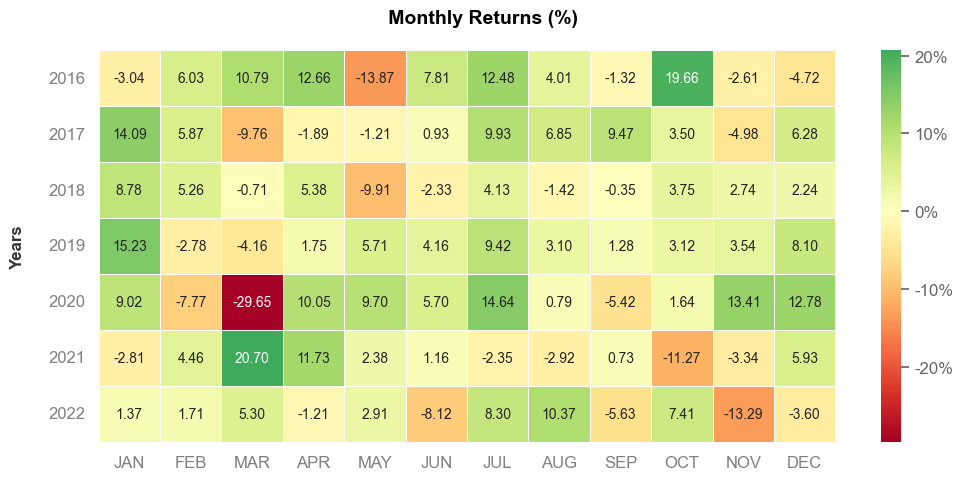

In [333]:
qs.extend_pandas()

retorno_modelo.plot_monthly_heatmap()

# Passo 9 - Puxar e calcular a rentabilidade do Ibovespa no período.

In [334]:
ibovespa = yf.download("^BVSP", start = "2015-12-30", end = "2022-12-31")['Adj Close']

ibovespa = ibovespa.resample("M").last().pct_change().dropna()

ibovespa

[*********************100%***********************]  1 of 1 completed


Date
2016-01-31   -0.067912
2016-02-29    0.059100
2016-03-31    0.169673
2016-04-30    0.077035
2016-05-31   -0.100889
                ...   
2022-08-31    0.061629
2022-09-30    0.004693
2022-10-31    0.054527
2022-11-30   -0.030602
2022-12-31   -0.021825
Freq: M, Name: Adj Close, Length: 84, dtype: float64

# Passo 10 -  Calcular e visualizar as rentabilidades do modelo contra o Ibovespa. 

c:\Users\rmnf\AppData\Local\Programs\Python\Python311\Lib\site-packages\quantstats\stats.py:968: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  returns = returns.pivot('Year', 'Month', 'Returns').fillna(0)


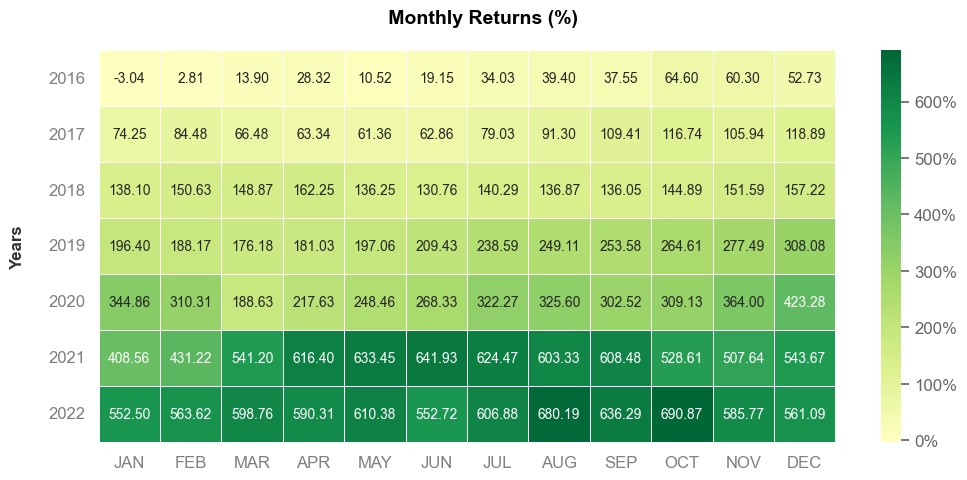

c:\Users\rmnf\AppData\Local\Programs\Python\Python311\Lib\site-packages\quantstats\stats.py:968: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  returns = returns.pivot('Year', 'Month', 'Returns').fillna(0)


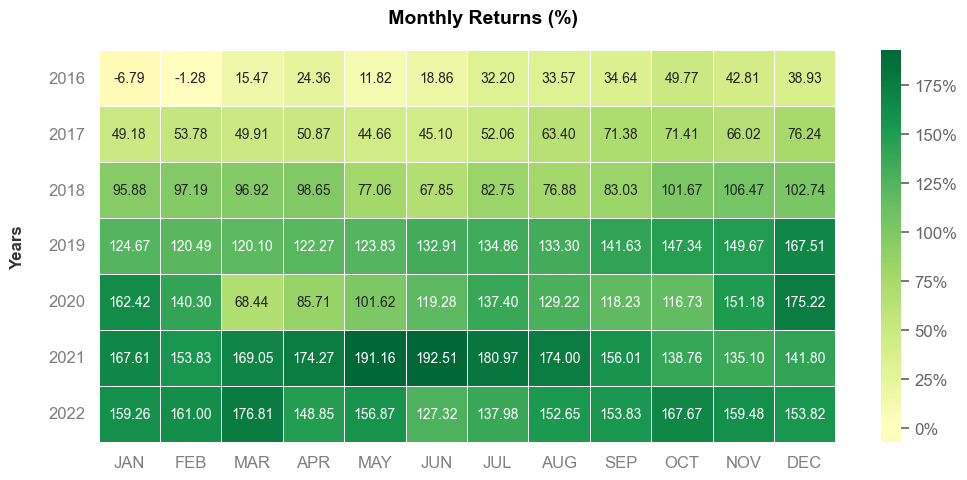

In [335]:
retorno_acum_modelo = (1 + retorno_modelo).cumprod() - 1 
retorno_acum_ibov =  (1 + ibovespa).cumprod() - 1

retorno_acum_modelo.plot_monthly_heatmap()
retorno_acum_ibov.plot_monthly_heatmap()

# Passo 11 -  Calcular e visualizar as rentabilidades do modelo mês a mês contra o Ibovespa. 

c:\Users\rmnf\AppData\Local\Programs\Python\Python311\Lib\site-packages\quantstats\stats.py:968: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  returns = returns.pivot('Year', 'Month', 'Returns').fillna(0)


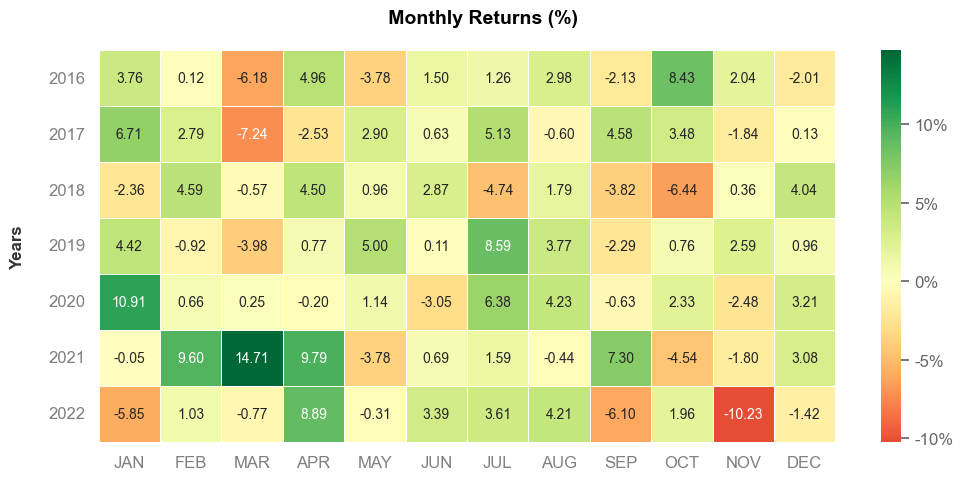

In [336]:
alpha_modelo = retorno_modelo - ibovespa

alpha_modelo.plot_monthly_heatmap()

c:\Users\rmnf\AppData\Local\Programs\Python\Python311\Lib\site-packages\quantstats\stats.py:968: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  returns = returns.pivot('Year', 'Month', 'Returns').fillna(0)


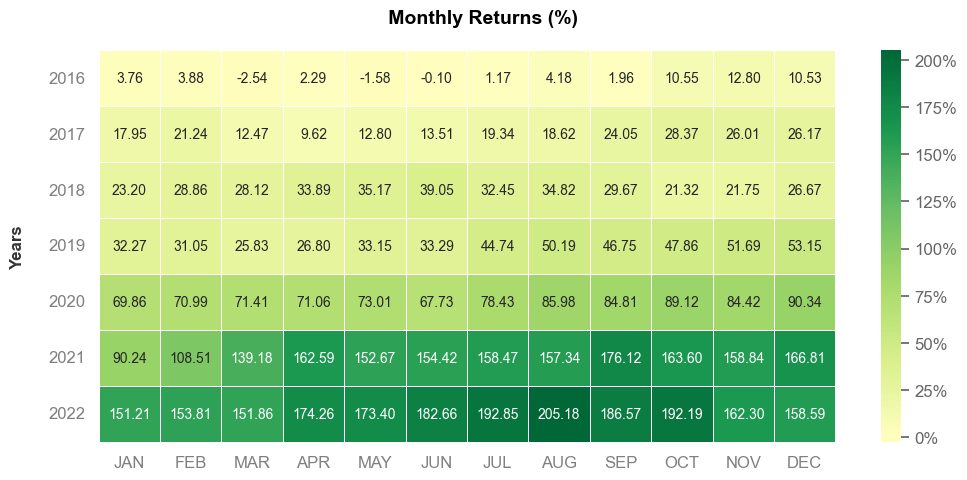

In [337]:
retorno_acum_alpha =  (1 + alpha_modelo).cumprod() - 1

retorno_acum_alpha.plot_monthly_heatmap()

In [338]:
alpha_total = retorno_acum_alpha.iloc[-1] * 100
num_alpha_total = pd.to_numeric(alpha_total)

alpha_anual = ((1+num_alpha_total/100)**(1/7) - 1) * 100
alpha_mensal = ((1+num_alpha_total/100)**(1/(7*12)) - 1) * 100

print(f"Alfa total gerado no intervalo analisado: {num_alpha_total:.2f} %")
print(f"Alfa anual gerado no intervalo analisado: {alpha_anual:.2f} %")
print(f"Alfa mensal gerado no intervalo analisado: {alpha_mensal:.2f} %")

print(f"Desvio padrão: {retorno_modelo.std()*100:.2f} %")
print(f"Sharpe (para rendimento 0 do ativo livre de risco): {num_alpha_total/retorno_modelo.std()/100:.2f}")


Alfa total gerado no intervalo analisado: 158.59 %
Alfa anual gerado no intervalo analisado: 14.54 %
Alfa mensal gerado no intervalo analisado: 1.14 %
Desvio padrão: 7.93 %
Sharpe (para rendimento 0 do ativo livre de risco): 20.00
